# Data Analysis

Nun wollen wir die gesammelten Daten (zum Zeitpunkt der Mini-Challenge-Abgabe) noch ein wenig genauer anschauen.

In [26]:
import pandas as pd
import seaborn as sea
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [27]:
# read data from csv
cash_df = pd.read_csv('./data/cash_news.csv')
cash_df.head(5)

,i_page,href,teaser,title,date,category
0,1.0,https://www.cash.ch/news/politik/rekord-sozial...,Neuer Erfolg für die linke Minderheitsregierun...,Rekord-Sozialausgaben in Spanien: Haushalt für...,24.11.2022 19:59,POLITIK
1,1.0,https://www.cash.ch/news/politik/ukraine-begin...,(Ausführliche Fassung) - Das gesamtukrainische...,Ukraine beginnt sich von massiven Blackouts zu...,24.11.2022 19:59,POLITIK
2,1.0,https://www.cash.ch/news/top-news/kapitalerhoh...,Bestehende Aktionäre und Aktionärinnen der Cre...,Kapitalerhöhung der Credit Suisse: Wichtige Fr...,24.11.2022 19:07,BANKEN
3,1.0,https://www.cash.ch/borsen-ticker/unternehmen/...,Die Genfer Kantonalbank (BCGE) hat auch die zw...,BCGE gewinnt auch in zweiten Runde gegen einen...,24.11.2022 18:33,UNTERNEHMEN
4,1.0,https://www.cash.ch/news/top-news/borsen-ticke...,Der SMI hat am Donnerstag weiter zugelegt. Es ...,Börsen-Ticker: SMI schliesst höher nach Fed-Pr...,aktualisiert um 18:31,+++MÄRKTE+++


## Transformieren des Datums

In [28]:
# remove string aktualisiert um from column date
cash_df['date'] = cash_df['date'].str.replace('aktualisiert um ', '')

# if colum date only contains the time, add the date of the previous row
cash_df['date'] = cash_df['date'].apply(lambda x: cash_df['date'].iloc[0] if len(x) < 6 else x)

# convert column date to datetime
cash_df['date'] = pd.to_datetime(cash_df['date'], format='%d.%m.%Y %H:%M')

## Analysen

In [29]:
# average number of articles per day
cash_df['date'].dt.date.value_counts().mean()

42.23849502487562

[Text(0.5, 1.0, 'Number of articles per day')]

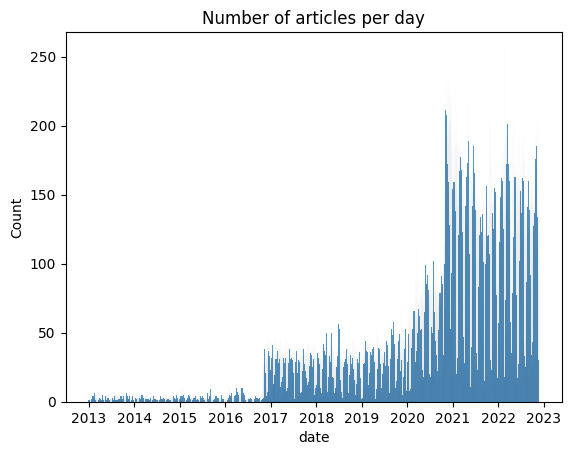

In [30]:
# make a histogram of the number of articles per day
sea.histplot(data=cash_df, x='date', bins = 3650).set(title='Number of articles per day')

Im Schnitt gab es 42 Artikel pro Tag. Im Plot sieht man, dass die Anzahl Artikel pro Tag immer mehr zugenommen hat. 2017 und 2021 hat es eher einen Sprung gemacht. Seit 2021 sind die Anzahl Artikel pro Tag ähnlich geblieben.

In [31]:
# get number of different categories
cash_df['category'].nunique()

8910

Es gibt 8910 verschiedene Kategorien der News-Artikel.

[Text(0, 0, 'UNTERNEHMEN'),
 Text(1, 0, 'POLITIK'),
 Text(2, 0, 'BÖRSE AUSLAND'),
 Text(3, 0, 'BÖRSE SCHWEIZ'),
 Text(4, 0, 'NEWS'),
 Text(5, 0, 'ÖKONOMIE & POLITIK'),
 Text(6, 0, 'BÖRSEN-KOMMENTAR'),
 Text(7, 0, 'FONDS NEWS'),
 Text(8, 0, 'KALENDER'),
 Text(9, 0, 'TOP NEWS')]

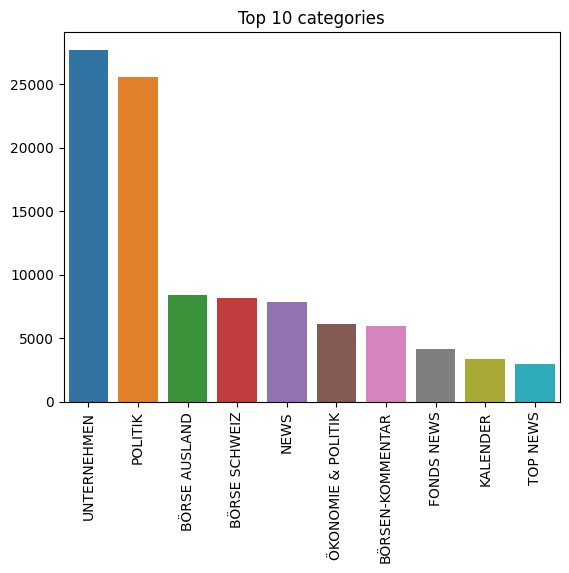

In [32]:
# get top 10 categories and plot them with seaborn and increase the size of the plot and rotate the x-axis labels
top_10_categories = cash_df['category'].value_counts().head(10)
p = sea.barplot(x=top_10_categories.index, y=top_10_categories.values)
p.set(title='Top 10 categories')
p.set_xticklabels(top_10_categories.index, rotation=90)


Die Kategorien Unternehmen und Politik sind sehr dominant. Auch Börse Ausland und Börse Schweiz machen einen grossen Teil der Kategorien aus. Als nächstes schauen wir die meistvorkommenden Wörter in den Titeln an.

In [33]:
words = cash_df['title'].str.split(expand=True).stack()

# remove all stopwords and words with less than 3 characters
stop_words = set(stopwords.words('german'))
words = words[~words.str.lower().isin(stop_words)]
words = words[words.str.match('[A-Z].*')]
words = words.str.replace(':', '')
words = words.str.replace(',', '')
words = words.str.replace('.', '')

words.value_counts().head(10)

C:\Users\rapha\AppData\Local\Temp\ipykernel_35288\928076829.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  words = words.str.replace('.', '')


Aktien           11407
Schweiz           8498
Schweizer         3675
New               3578
York              3476
USA               3210
Briefing          3193
Euro              3164
Frankfurt         2989
International     2853
dtype: int64

Die meistvorkommenden Wörter entsprechen etwa unseren Vorstellungen. Überraschend finden wir, dass die Schweizer Seite doch sehr international geprägt ist: Nur zwei Wörter haben einen direkten bezug zur Schweiz. Euro wird sogar mehr erwähnt als Franken. Um die Vorkommenisse der Wörter noch besser darzustellen, setzen wir sie noch in eine Wordcloud.

(-0.5, 799.5, 799.5, -0.5)

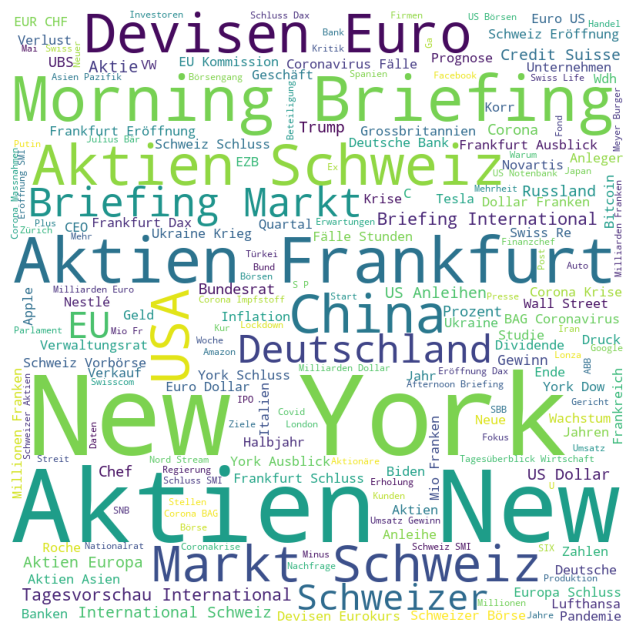

In [34]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(' '.join(words))
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")

#### Fazit

Die Daten sehen sehr sauber aus. Bereits mit der kurzen Auswertung der Texte konnten einige Erkenntnisse ausgelesen werden. Nun könnten diese für das genauere Untersuchen unserer These gebraucht werden. Dies setzen wir aber nicht in dieser MC um.